In [1]:
# prompt: Open images from captchas.rar and prepare it for machine learning
import rarfile
import cv2
import numpy as np
import os

# Extract images from the RAR archive
def extract_images(rar_filepath, extract_path):
    try:
        with rarfile.RarFile(rar_filepath) as rf:
            rf.extractall(extract_path)
        print(f"Successfully extracted images to '{extract_path}'")
    except FileNotFoundError:
        print(f"Error: RAR file '{rar_filepath}' not found.")
    except rarfile.BadRarFile:
        print(f"Error: Invalid RAR file '{rar_filepath}'.")





# Example Usage:
rar_file = 'captchas.rar'
extract_dir = 'extracted_captchas'
processed_images_dir = "processed_captchas"

extract_images(rar_file, extract_dir)


RarCannotExec: Cannot find working tool

Ground truth coordinates: x1=105, y1=175, x2=180, y2=207


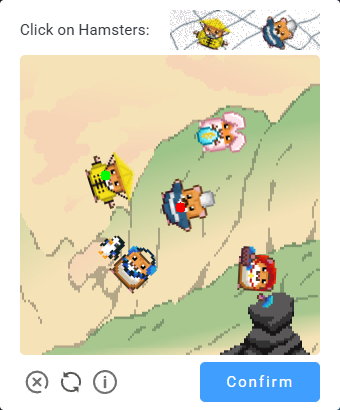

Ground truth coordinates: x1=85, y1=120, x2=160, y2=152


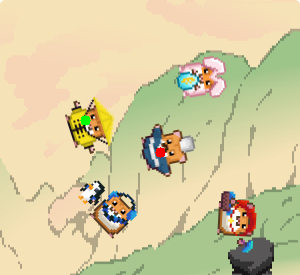

In [85]:
import cv2
import numpy as np
import torch
import pandas as pd
from google.colab.patches import cv2_imshow

def draw_labels_on_image(image_path, labels_file):
    """
    Loads an image from image_path, retrieves ground truth (x1, y1, x2, y2) from labels.txt,
    and displays the image with red circles at those coordinates.

    Args:
        image_path (str): Path to the image.
        labels_file (str): Path to the labels file (CSV or TXT with x1, y1, x2, y2).
    """
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    if image is None:
        print(f"Unable to load image: {image_path}")
        return

    # Resize the image to (width=340, height=410) to match the model's expected size
    image_resized = image#cv2.resize(image, (340, 410))

    # Read labels from the file
    labels_df = pd.read_csv(labels_file)  # Ensure labels.txt is formatted correctly
    image_name = image_path.split('/')[-1]  # Extract filename from path

    # Find the row corresponding to the image name (assuming there is an 'id' or filename column)
    if 'img_name' in labels_df.columns:
        row = labels_df[labels_df['img_name'] == image_name]
    else:
        row = labels_df.iloc[0]  # If there's no ID column, just use the first row (for testing)

    if row.empty:
        print(f"No labels found for {image_name}")
        return

    # Extract ground truth coordinates
    x1, y1, x2, y2 = row[['x1', 'y1', 'x2', 'y2']].to_numpy().flatten()
    x1 = int(x1)
    x2 = int(x2)
    y1 = int(y1)
    y2 = int(y2)
    print(f"Ground truth coordinates: x1={x1}, y1={y1}, x2={x2}, y2={y2}")

    # Draw red circles at the ground truth coordinates
    image_drawn = image_resized.copy()
    cv2.circle(image_drawn, (x1, y1), radius=5, color=(0, 255, 0), thickness=-1)  # Green circle
    cv2.circle(image_drawn, (x2, y2), radius=5, color=(0, 0, 255), thickness=-1)  # Red circle

    # Display the image with the drawn points
    cv2_imshow(image_drawn)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

extract_dir = 'extracted_captchas'
processed_images_dir = "processed_captchas"
image_path = f"{extract_dir}/captchas_saved/captcha_8.png"
labels_file = "labels.txt"
draw_labels_on_image(image_path,labels_file)
image_path = f"truncated_captchas/captcha_8.png"
labels_file = "truncated_labels.csv"
draw_labels_on_image(image_path,labels_file)


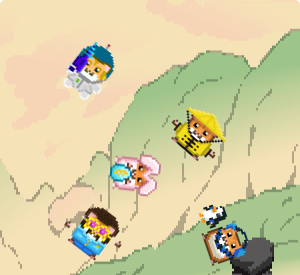

In [74]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use cv2_imshow() in Google Colab

def show_pixels(image_path,nbPixelsHaut,nbPixelsBas,nbPixelsGauche,nbPixelsDroite):
    """
    Displays the top 20 rows of an image.

    Args:
        image_path (str): Path to the image file.
    """
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return
    nbPixelsHaut,nbPixelsBas,nbPixelsGauche,nbPixelsDroite = 330,55,20,320
    top_20 = image[nbPixelsBas:nbPixelsHaut, nbPixelsGauche:nbPixelsDroite]

    # Display the cropped section
    cv2_imshow(top_20)  # Use cv2_imshow in Google Colab, replace with cv2.imshow() for local use
    cv2.waitKey(0)
    cv2.destroyAllWindows()


extract_dir = 'extracted_captchas'
processed_images_dir = "processed_captchas"
image_path = f"{extract_dir}/captchas_saved/captcha_315.png"
labels_file = "labels.txt"
nbPixelsHaut,nbPixelsBas,nbPixelsGauche,nbPixelsDroite = 330,55,20,320
show_pixels(image_path,nbPixelsHaut,nbPixelsBas,nbPixelsGauche,nbPixelsDroite)

In [81]:
import pandas as pd

def adjust_x_coordinates(label, nbPixelsGauche):
    return label - nbPixelsGauche

def adjust_y_coordinates(label, nbPixelsBas):
    return label - nbPixelsBas

# Load the labels file
df = pd.read_csv("labels.txt")

# Ensure the coordinate columns are numeric
df[['x1', 'y1', 'x2', 'y2']] = df[['x1', 'y1', 'x2', 'y2']].apply(pd.to_numeric)

# Define the cropping values
nbPixelsHaut, nbPixelsBas, nbPixelsGauche, nbPixelsDroite = 330, 55, 20, 320

# Adjust coordinates
df['x1'] = df['x1'].apply(lambda x: adjust_x_coordinates(x, nbPixelsGauche))
df['x2'] = df['x2'].apply(lambda x: adjust_x_coordinates(x, nbPixelsGauche))
df['y1'] = df['y1'].apply(lambda y: adjust_y_coordinates(y, nbPixelsBas))
df['y2'] = df['y2'].apply(lambda y: adjust_y_coordinates(y, nbPixelsBas))

# Save the adjusted labels
df.to_csv('truncated_labels.csv', index=False)

# Display the updated DataFrame
print(df)


            img_name          x1          y1          x2          y2
0      captcha_1.png   91.816017  191.209957   99.581169   63.639610
1     captcha_10.png   99.581169  188.991342  200.528139  112.449134
2    captcha_100.png  148.390693  237.800866   67.411255  236.691558
3    captcha_101.png  187.216450  170.133117  105.127706  210.068182
4    captcha_102.png  140.625541  175.679654  200.528139  215.614719
..               ...         ...         ...         ...         ...
311   captcha_95.png  128.423160   80.279221  167.248918  227.817100
312   captcha_96.png   94.034632   85.825758   89.597403  217.833333
313   captcha_97.png   90.706710  215.614719  183.888528  137.963203
314   captcha_98.png   90.706710  150.165584  221.604978   94.700216
315   captcha_99.png   87.378788  232.254329   68.520563  162.367965

[316 rows x 5 columns]


In [67]:
import os
import cv2

def crop_and_save_images(input_folder, output_folder="truncated_captchas"):
    """
    Crops images in the input_folder according to predefined pixel boundaries
    and saves them to the output_folder with the same filenames.

    Args:
        input_folder (str): Path to the folder containing the original images.
        output_folder (str): Path where the cropped images will be saved.
    """
    # Define cropping boundaries
    nbPixelsHaut, nbPixelsBas, nbPixelsGauche, nbPixelsDroite = 330, 55, 20, 320

    # Create output folder if it does not exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Process each image in the input folder
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        # Read the image
        image = cv2.imread(input_path)
        if image is None:
            print(f"Skipping {filename} (could not load image)")
            continue

        # Apply cropping
        cropped_image = image[nbPixelsBas:nbPixelsHaut, nbPixelsGauche:nbPixelsDroite]

        # Save the cropped image to the new folder
        cv2.imwrite(output_path, cropped_image)
        print(f"Saved cropped image: {output_path}")

# Example Usage
crop_and_save_images("extracted_captchas/captchas_saved")


Saved cropped image: truncated_captcha/captcha_223.png
Saved cropped image: truncated_captcha/captcha_161.png
Saved cropped image: truncated_captcha/captcha_170.png
Saved cropped image: truncated_captcha/captcha_40.png
Saved cropped image: truncated_captcha/captcha_220.png
Saved cropped image: truncated_captcha/captcha_282.png
Saved cropped image: truncated_captcha/captcha_183.png
Saved cropped image: truncated_captcha/captcha_151.png
Saved cropped image: truncated_captcha/captcha_117.png
Saved cropped image: truncated_captcha/captcha_157.png
Saved cropped image: truncated_captcha/captcha_131.png
Saved cropped image: truncated_captcha/captcha_47.png
Saved cropped image: truncated_captcha/captcha_23.png
Saved cropped image: truncated_captcha/captcha_165.png
Saved cropped image: truncated_captcha/captcha_288.png
Saved cropped image: truncated_captcha/captcha_41.png
Saved cropped image: truncated_captcha/captcha_235.png
Saved cropped image: truncated_captcha/captcha_232.png
Saved cropped 